In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
equity = pd.read_csv("equity_fixedincome.csv", index_col = "Date", parse_dates = ["Date"])

In [3]:
# Checking NaN values
equity.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USEquity      1259 non-null   float64
 1   Europe        1227 non-null   float64
 2   EmergMarkets  1259 non-null   float64
 3   GovBonds      1237 non-null   float64
 4   CorpBonds     1237 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB


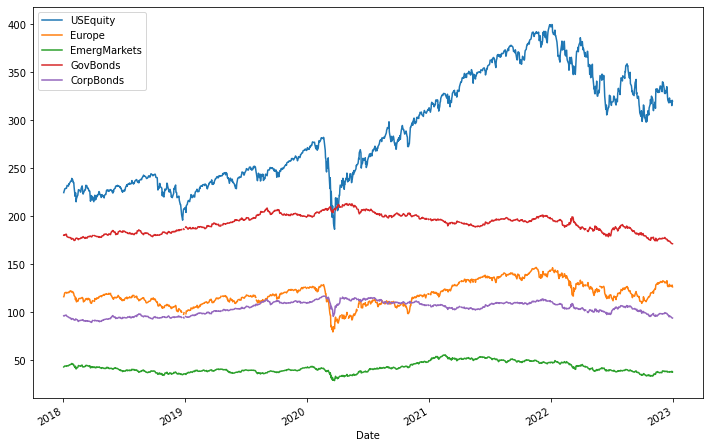

In [4]:
equity.plot(figsize = (12, 8))
plt.show()

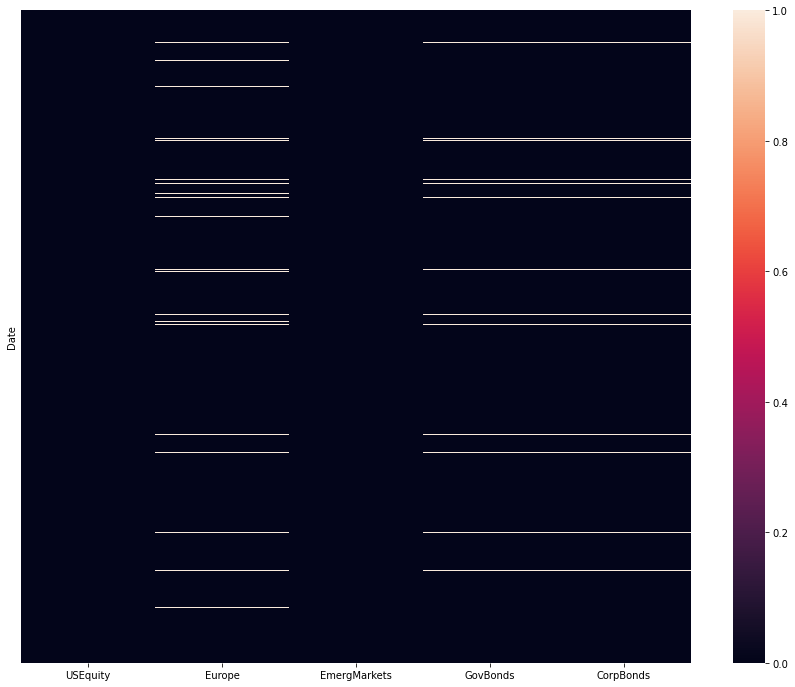

In [5]:
# Detecting and visualizing positions of NaN values in the dataset
plt.figure(figsize= (15, 12))
sns.heatmap(equity.isna(), yticklabels= False)
plt.show()

# NaN values clustered and most likely caused by closed Exchanges

In [6]:
# Filling in missing values (NaN) with the last valid trading price (method = "ffill").
equity.fillna(method = "ffill", inplace = True)
equity.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USEquity      1259 non-null   float64
 1   Europe        1259 non-null   float64
 2   EmergMarkets  1259 non-null   float64
 3   GovBonds      1259 non-null   float64
 4   CorpBonds     1259 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB


In [7]:
crypto = pd.read_csv("crypto.csv", index_col = "Time", parse_dates = ["Time"])
crypto

,Open,High,Low,Close
Time,,,,
2018-01-01 01:00:00,114.30,114.30,111.67,112.74
2018-01-01 02:00:00,112.74,113.30,109.63,110.03
2018-01-01 03:00:00,110.02,111.82,110.00,111.08
2018-01-01 04:00:00,111.09,113.43,110.75,111.75
2018-01-01 05:00:00,111.96,113.53,111.02,113.34
...,...,...,...,...
2023-01-31 21:00:00,193.02,193.11,192.04,192.46
2023-01-31 22:00:00,192.46,192.70,190.11,191.24
2023-01-31 23:00:00,191.23,194.33,190.60,193.18


In [8]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44448 entries, 2018-01-01 01:00:00 to 2023-02-01 01:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    44448 non-null  float64
 1   High    44448 non-null  float64
 2   Low     44448 non-null  float64
 3   Close   44448 non-null  float64
dtypes: float64(4)
memory usage: 1.7 MB


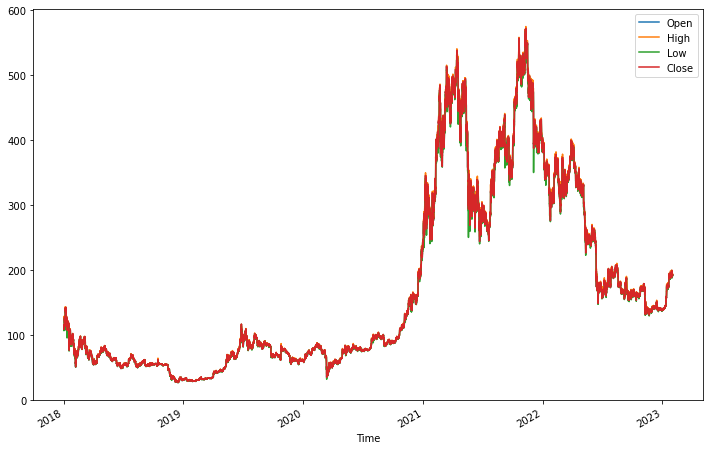

In [9]:
crypto.plot(figsize = (12, 8))
plt.show()

In [10]:
crypto = crypto["Close"].to_frame()

In [11]:
crypto.columns = ["Crypto"]
crypto

,Crypto
Time,
2018-01-01 01:00:00,112.74
2018-01-01 02:00:00,110.03
2018-01-01 03:00:00,111.08
2018-01-01 04:00:00,111.75
2018-01-01 05:00:00,113.34
...,...
2023-01-31 21:00:00,192.46
2023-01-31 22:00:00,191.24
2023-01-31 23:00:00,193.18


In [12]:
print(crypto.index.tzinfo)

None


In [13]:
# Localizing the Index to "Europe/Berlin" timezone
crypto = crypto.tz_localize(tz = "Europe/Berlin", ambiguous = "infer")
crypto

,Crypto
Time,
2018-01-01 01:00:00+01:00,112.74
2018-01-01 02:00:00+01:00,110.03
2018-01-01 03:00:00+01:00,111.08
2018-01-01 04:00:00+01:00,111.75
2018-01-01 05:00:00+01:00,113.34
...,...
2023-01-31 21:00:00+01:00,192.46
2023-01-31 22:00:00+01:00,191.24
2023-01-31 23:00:00+01:00,193.18


In [14]:
# Converting the timezone to "US/Eastern"
crypto = crypto.tz_convert(tz = "US/Eastern")
crypto

,Crypto
Time,
2017-12-31 19:00:00-05:00,112.74
2017-12-31 20:00:00-05:00,110.03
2017-12-31 21:00:00-05:00,111.08
2017-12-31 22:00:00-05:00,111.75
2017-12-31 23:00:00-05:00,113.34
...,...
2023-01-31 15:00:00-05:00,192.46
2023-01-31 16:00:00-05:00,191.24
2023-01-31 17:00:00-05:00,193.18


In [15]:
crypto.index.tzinfo

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

In [16]:
# Resampling the cryptocurrency DataFrame to "end-of-day" daily ("d") 
# data by selecting the last known value on each trading day.

crypto = crypto.resample(rule = "d").last()
crypto

,Crypto
Time,
2017-12-31 00:00:00-05:00,113.34
2018-01-01 00:00:00-05:00,109.39
2018-01-02 00:00:00-05:00,125.16
2018-01-03 00:00:00-05:00,126.00
2018-01-04 00:00:00-05:00,123.50
...,...
2023-01-27 00:00:00-05:00,192.44
2023-01-28 00:00:00-05:00,193.57
2023-01-29 00:00:00-05:00,197.65


In [17]:
# Removing the time from the DatetimeIndex by selecting the date only.

crypto.index = crypto.index.date

In [18]:
# Changing the index name from "Time" to "Date" 
crypto.index.name = "Date"
crypto

,Crypto
Date,
2017-12-31,113.34
2018-01-01,109.39
2018-01-02,125.16
2018-01-03,126.00
2018-01-04,123.50
...,...
2023-01-27,192.44
2023-01-28,193.57
2023-01-29,197.65


In [19]:
alter = pd.read_csv("alternative.csv", parse_dates = ["Date"])
alter

,Date,Commodities,RealEstate
0,Date: 2018-01-02,8.21,21.24
1,Date: 2018-01-03,8.23,21.27
2,Date: 2018-01-04,8.25,20.97
3,Date: 2018-01-05,8.25,21.02
4,Date: 2018-01-08,8.24,21.05
...,...,...,...
1255,Date: 2022-12-23,11.22,22.56
1256,Date: 2022-12-27,11.34,22.54
1257,Date: 2022-12-28,11.30,22.22
1258,Date: 2022-12-29,11.37,22.69


In [20]:
alter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1260 non-null   object 
 1   Commodities  1260 non-null   float64
 2   RealEstate   1260 non-null   float64
dtypes: float64(2), object(1)
memory usage: 29.7+ KB


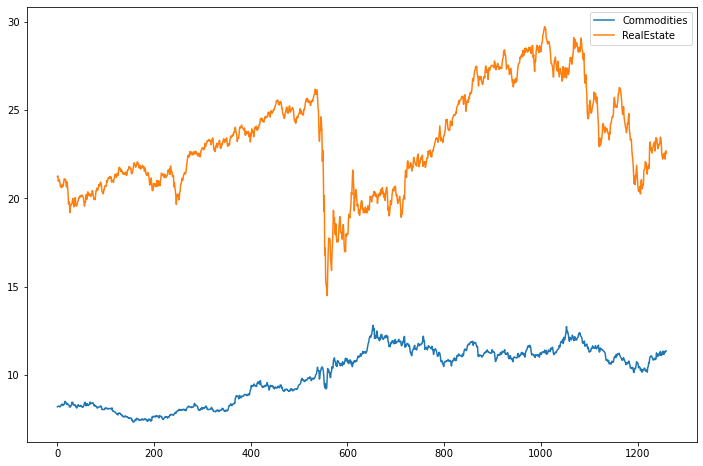

In [21]:
alter.plot(figsize = (12, 8))
plt.show()

In [22]:
# Removing the pattern (pat) "Date: " from all elements in the "Date" 
# column by replacing it with an empty string.
alter.Date = alter.Date.str.replace(pat = "Date: ", repl =  "")
alter

,Date,Commodities,RealEstate
0,2018-01-02,8.21,21.24
1,2018-01-03,8.23,21.27
2,2018-01-04,8.25,20.97
3,2018-01-05,8.25,21.02
4,2018-01-08,8.24,21.05
...,...,...,...
1255,2022-12-23,11.22,22.56
1256,2022-12-27,11.34,22.54
1257,2022-12-28,11.30,22.22
1258,2022-12-29,11.37,22.69


In [23]:
# Coverting "Date" into a datetime column
alter.Date = pd.to_datetime(alter.Date)

In [24]:
# Setting the "Date" column as the DatetimeIndex of the DataFrame
alter.set_index(keys = "Date", inplace = True)
alter.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2018-01-02 to 2022-12-30
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Commodities  1260 non-null   float64
 1   RealEstate   1260 non-null   float64
dtypes: float64(2)
memory usage: 29.5 KB


In [25]:
# Conforming the indexes of crypto and alter to the index in equity
crypto = crypto.reindex(equity.index)
alter = alter.reindex(equity.index)

In [27]:
# Concatenating/merging all three datasets horizontally
all_assets = pd.concat([equity, crypto, alter], axis = 1)
all_assets

,USEquity,Europe,EmergMarkets,GovBonds,CorpBonds,Crypto,Commodities,RealEstate
Date,,,,,,,,
2018-01-02,224.65,116.23,43.05,180.38,96.37,125.16,8.21,21.24
2018-01-03,226.09,117.00,43.47,180.80,96.63,126.00,8.23,21.27
2018-01-04,227.00,118.96,43.68,180.11,96.32,123.50,8.25,20.97
2018-01-05,228.60,120.25,44.06,180.30,96.54,137.25,8.25,21.02
2018-01-08,228.98,120.55,44.06,181.04,97.01,127.91,8.24,21.05
...,...,...,...,...,...,...,...,...
2022-12-23,320.40,127.23,37.80,173.26,95.83,140.24,11.22,22.56
2022-12-27,319.10,127.76,38.36,171.70,94.77,138.84,11.34,22.54
2022-12-28,315.27,126.96,37.80,171.52,94.26,138.10,11.30,22.22


In [28]:
all_assets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-01-02 to 2022-12-30
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USEquity      1259 non-null   float64
 1   Europe        1259 non-null   float64
 2   EmergMarkets  1259 non-null   float64
 3   GovBonds      1259 non-null   float64
 4   CorpBonds     1259 non-null   float64
 5   Crypto        1258 non-null   float64
 6   Commodities   1259 non-null   float64
 7   RealEstate    1259 non-null   float64
dtypes: float64(8)
memory usage: 88.5 KB


In [29]:
all_assets[all_assets.Crypto.isna()]

# One missing value in Crypto on 2018-02-08 due to a data source error.

,USEquity,Europe,EmergMarkets,GovBonds,CorpBonds,Crypto,Commodities,RealEstate
Date,,,,,,,,
2018-02-08,215.08,112.58,40.97,177.0,92.71,NaN,8.23,19.2


In [30]:
# Filling the missing value (NaN) with (linear) interpolation
all_assets["Crypto"] = all_assets.Crypto.interpolate()

In [31]:
# Dividing all rows by the very first row and then multiplying with the Base Value of 100.

norm = all_assets.div(all_assets.iloc[0]).mul(100)
norm

,USEquity,Europe,EmergMarkets,GovBonds,CorpBonds,Crypto,Commodities,RealEstate
Date,,,,,,,,
2018-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2018-01-03,100.640997,100.662480,100.975610,100.232842,100.269794,100.671141,100.243605,100.141243
2018-01-04,101.046072,102.348791,101.463415,99.850316,99.948117,98.673698,100.487211,98.728814
2018-01-05,101.758291,103.458660,102.346109,99.955649,100.176403,109.659636,100.487211,98.964218
2018-01-08,101.927443,103.716768,102.346109,100.365894,100.664107,102.197188,100.365408,99.105461
...,...,...,...,...,...,...,...,...
2022-12-23,142.621856,109.463994,87.804878,96.052777,99.439660,112.048578,136.662607,106.214689
2022-12-27,142.043178,109.919986,89.105691,95.187937,98.339732,110.930010,138.124239,106.120527
2022-12-28,140.338304,109.231696,87.804878,95.088147,97.810522,110.338766,137.637028,104.613936


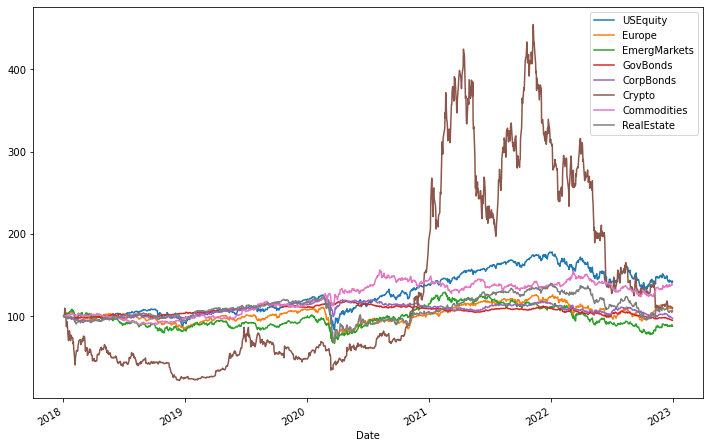

In [32]:
# Creating a price chart with normalized prices for all eight Asset Classes.

norm.plot(figsize = (12, 8))
plt.show()

# USEquity (blue) performed best. EmergMarkets (green) performed worst.

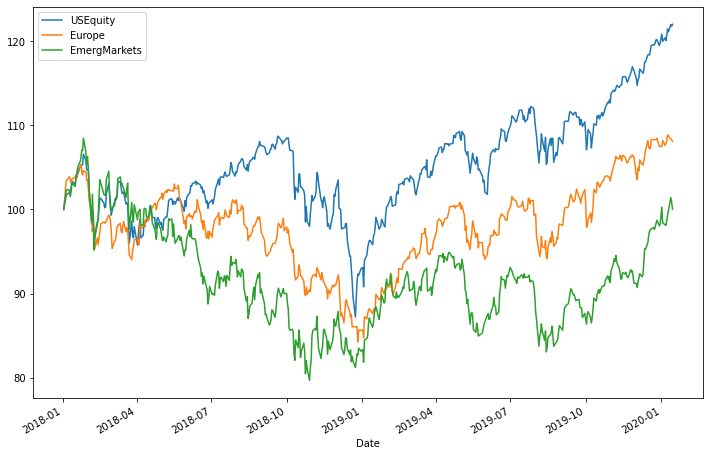

In [33]:
# Visually comparing the Equity Sub-Asset Classes (USEquity, Europe, EmergMarkets) 
# in the pre-Covid 19 period from the beginning of 2018 until mid of January 2020 (2020-01-15)
# with a normalized price chart.

norm.loc["2018":"2020-01-15", ["USEquity", "Europe", "EmergMarkets"]].plot(figsize = (12, 8))
plt.show()

In [34]:
# Calculate and save (returns) daily price percentage changes (financial returns) for all eight Asset Classes
returns = all_assets.pct_change().dropna()
returns

,USEquity,Europe,EmergMarkets,GovBonds,CorpBonds,Crypto,Commodities,RealEstate
Date,,,,,,,,
2018-01-03,0.006410,0.006625,0.009756,0.002328,0.002698,0.006711,0.002436,0.001412
2018-01-04,0.004025,0.016752,0.004831,-0.003816,-0.003208,-0.019841,0.002430,-0.014104
2018-01-05,0.007048,0.010844,0.008700,0.001055,0.002284,0.111336,0.000000,0.002384
2018-01-08,0.001662,0.002495,0.000000,0.004104,0.004868,-0.068051,-0.001212,0.001427
2018-01-09,0.001266,0.001742,-0.001589,0.001989,0.001237,-0.072238,-0.004854,-0.005701
...,...,...,...,...,...,...,...,...
2022-12-23,0.005871,-0.001648,-0.001321,-0.004196,-0.003224,-0.000499,0.004476,0.008945
2022-12-27,-0.004057,0.004166,0.014815,-0.009004,-0.011061,-0.009983,0.010695,-0.000887
2022-12-28,-0.012003,-0.006262,-0.014599,-0.001048,-0.005381,-0.005330,-0.003527,-0.014197


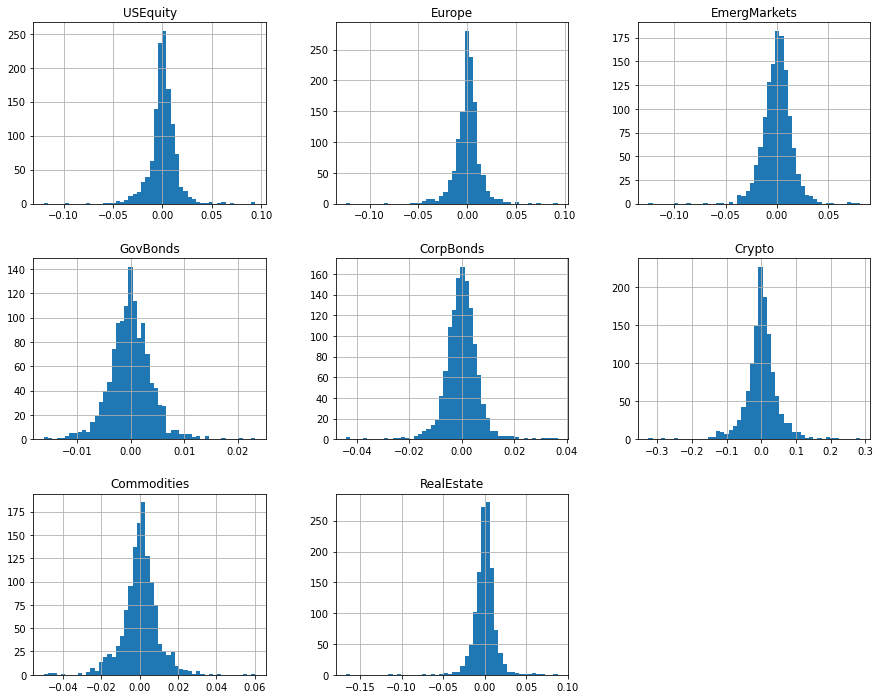

In [35]:
# Comparing the Distribution/Dispersion of returns with a histogram

returns.hist(figsize = (15, 12), bins = 50)
plt.show()

# Crypto shows the highest Volatility and GovBonds shows the lowest volatility of returns.

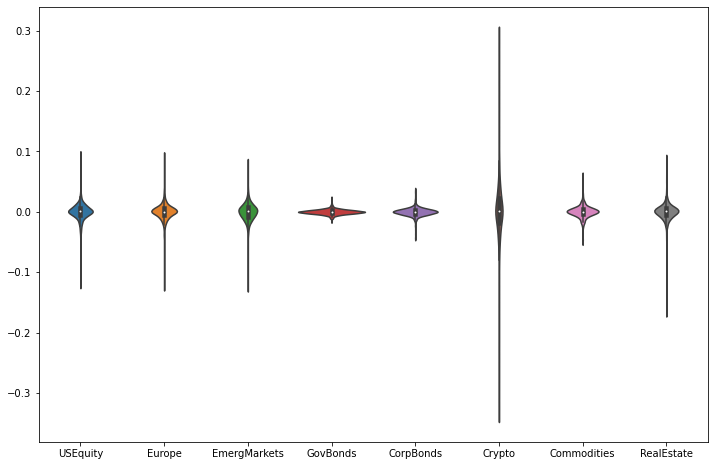

In [36]:
# Visualizing and comparing the Volatility profile of returns with a seaborn violinplot.

plt.figure(figsize= (12, 8))
sns.violinplot(data = returns)
plt.show()